## Importing Required Libraries

In [2]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

2024-05-19 09:23:10.700494: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 09:23:10.700660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 09:23:10.879503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Assigning Path for Dataset

In [3]:
TRAIN_DIR = "/kaggle/input/face-expression-recognition-dataset/images/train"
TEST_DIR = "/kaggle/input/face-expression-recognition-dataset/images/validation"
BATCH_SIZE=64

### Will see how many categories and images present

In [4]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 3205 in folder surprise
For training data, found 4103 in folder fear
For training data, found 3993 in folder angry
For training data, found 4982 in folder neutral
For training data, found 4938 in folder sad
For training data, found 436 in folder disgust
For training data, found 7164 in folder happy


In [5]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 797 in folder surprise
For testing data, found 1018 in folder fear
For testing data, found 960 in folder angry
For testing data, found 1216 in folder neutral
For testing data, found 1139 in folder sad
For testing data, found 111 in folder disgust
For testing data, found 1825 in folder happy


### Will see some random images withe their labels

In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [7]:
class_names = ['surprise','fear','angry','neutral','sad','disgust','happy']

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)


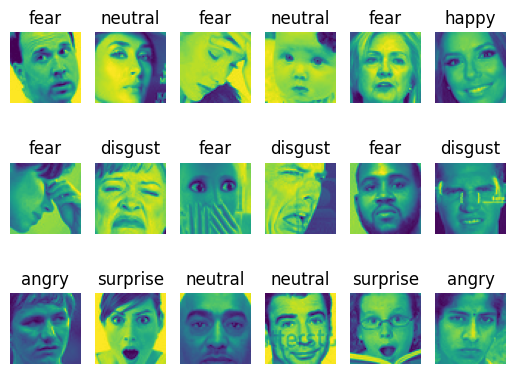

In [8]:

print(class_names)
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/kaggle/input/face-expression-recognition-dataset/images/train/", target_class=class_name)

### Preparing data for training

In [9]:
# from keras.preprocessing.image import ImageDataGenerator
from keras.src.legacy.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


### Basic model building (CNN Classifier)

In [10]:
from keras.optimizers import Adam

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 7, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
## model summary
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,692,519 (14.09 MB)

 Trainable params: 3,692,519 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


451/451 ━━━━━━━━━━━━━━━━━━━━ 432s 941ms/step - accuracy: 0.2778 - loss: 2.0650 - val_accuracy: 0.3581 - val_loss: 1.6381
Epoch 2/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 266s 584ms/step - accuracy: 0.3829 - loss: 1.5909 - val_accuracy: 0.4277 - val_loss: 1.4934
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 328s 597ms/step - accuracy: 0.4247 - loss: 1.4951 - val_accuracy: 0.4451 - val_loss: 1.4566
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 271s 596ms/step - accuracy: 0.4486 - loss: 1.4329 - val_accuracy: 0.4690 - val_loss: 1.3912
Epoch 5/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 267s 587ms/step - accuracy: 0.4670 - loss: 1.3915 - val_accuracy: 0.4733 - val_loss: 1.3660
Epoch 6/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 325s 592ms/step - accuracy: 0.4766 - loss: 1.3557 - val_accuracy: 0.4844 - val_loss: 1.3491
Epoch 7/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 269s 591ms/step - accuracy: 0.4898 - loss: 1.3287 - val_accuracy: 0.4924 - val_loss: 1.3290
Epoch 8/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 316s 578ms/step - accuracy: 0.5012 - loss: 1.30

### Evaluating the model

In [18]:
classifier.save('model2.h5')  # creates a HDF5 file 'my_model.h5'

In [19]:
classifier.save('model2.h5')  # creates a HDF5 file 'my_model.h5'

In [20]:
classifier.evaluate(test_set)

111/111 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.5210 - loss: 1.4068


[1.3609668016433716, 0.5263232588768005]

Text(0, 0.5, 'Loss')

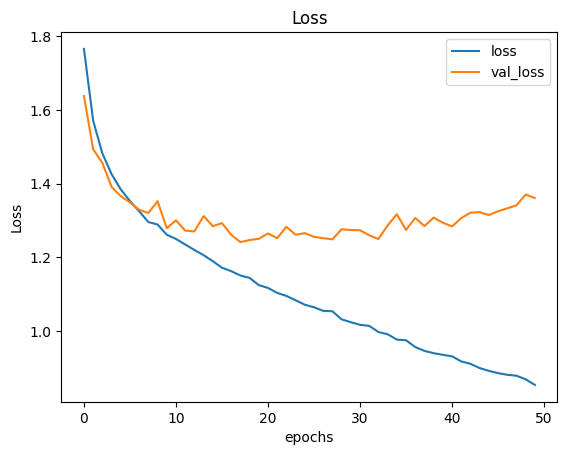

In [21]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

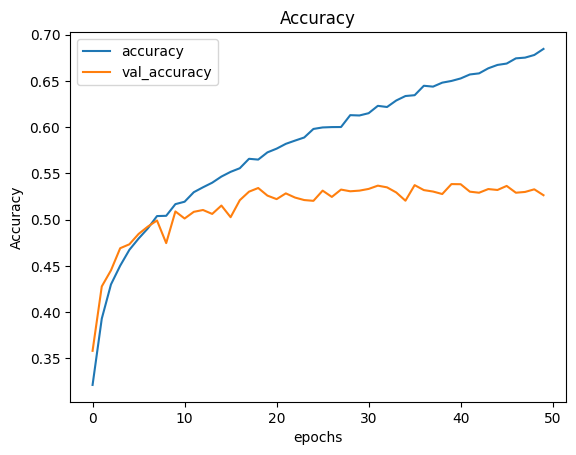

In [22]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [17]:
model_path = "model2.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("00000.jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

[ WARN:0@0.120] global loadsave.cpp:248 findDecoder imread_('00000.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute '__array_interface__'

In [ ]:
training_set.class_indices